In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
import numpy as np
from scipy import stats
import sklearn.cluster as cluster
from sklearn.preprocessing import scale
import seaborn as sns
from skbio.stats.composition import clr, closure, centralize, multiplicative_replacement, clr_inv, ilr, ilr_inv
from scipy.stats import spearmanr

In [7]:
s123 = pd.read_csv("C:\\Users\\marpr\\Desktop\\docto\\respuestas-s123_v1.1.csv", sep=',')
# s123 = scale(np.asarray(s123))
s123 = pd.DataFrame(s123)
s123

,S3-1,S1-High,S2-Relatively High,S1-Low,S3-3,S1-Medium Low,S2-Relatively Low,S1-Medium High,S3-2
0,2,3,23,3,8,17,45,11,11
1,4,3,34,3,5,15,34,17,15
2,21,12,60,0,1,2,8,9,2
3,16,14,41,4,6,1,21,5,3
4,9,3,54,0,4,6,14,24,8
5,7,3,47,3,5,13,19,12,13
6,8,3,27,0,6,13,35,11,9
7,4,2,37,3,5,8,26,14,13
8,5,5,48,2,6,8,19,15,16
9,3,4,17,3,8,15,46,13,12


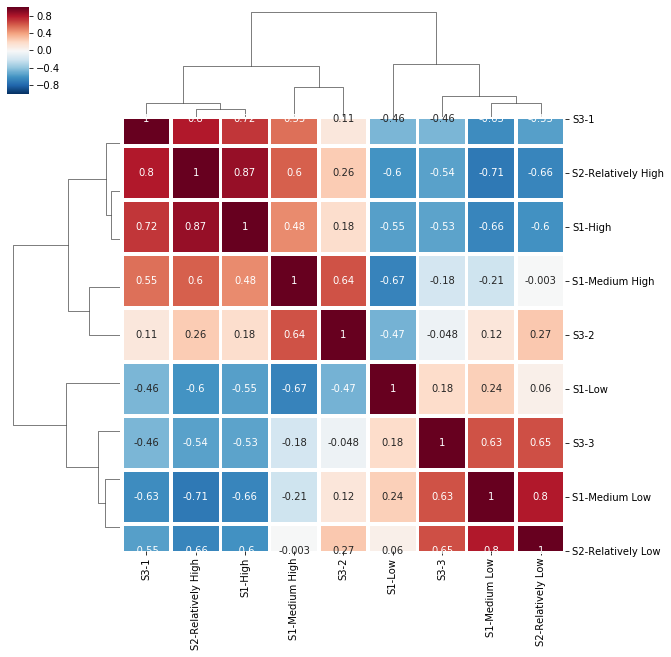

In [4]:
s123_clr = clr(centralize(multiplicative_replacement(closure(s123), delta = 0.0001)))
cor, pval = stats.spearmanr(s123_clr)
pval = pd.DataFrame(pval)
s123_clr = pd.DataFrame(s123_clr)
s123_clr_corr = s123_clr.corr(method = 'spearman')


s123_clr_corr.columns = ['S3-1','S2-Relatively High','S1-High','S1-Medium High', 'S3-2','S1-Low','S3-3','S1-Medium Low','S2-Relatively Low']
s123_clr_corr.index = ['S3-1','S2-Relatively High','S1-High','S1-Medium High', 'S3-2','S1-Low','S3-3','S1-Medium Low','S2-Relatively Low']
# mask = np.zeros_like(s123)
# f, ax = plt.subplots(figsize=(11, 9))
# mask[np.triu_indices_from(mask)] = True
# plt.title("Spearman Correlation between Certainty Categories")
iris = sns.clustermap(s123_clr_corr, cmap="RdBu_r", annot=True, linewidths=2.5, vmax=1.0, vmin=-1.0 )
# iris.savefig('Spearman Correlation between Certainty Categories_compositional.png', dpi=500)


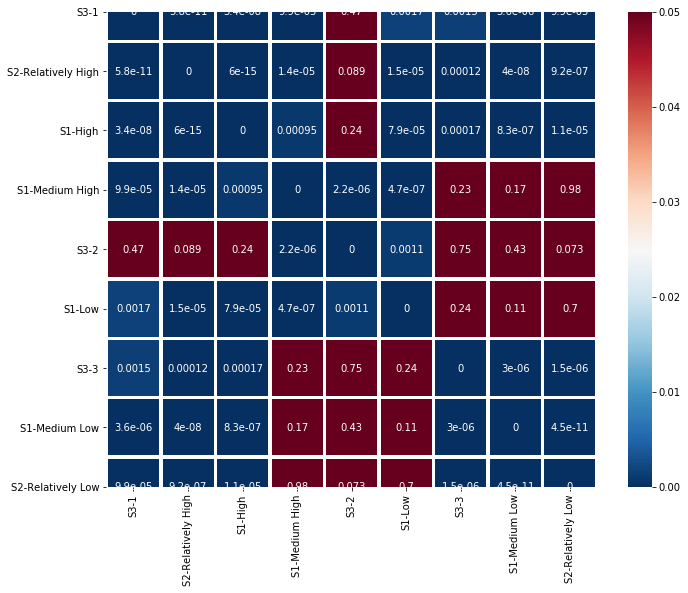

In [5]:
pval.columns = ['S3-1','S2-Relatively High','S1-High','S1-Medium High', 'S3-2','S1-Low','S3-3','S1-Medium Low','S2-Relatively Low']
pval.index = ['S3-1','S2-Relatively High','S1-High','S1-Medium High', 'S3-2','S1-Low','S3-3','S1-Medium Low','S2-Relatively Low']
f, ax = plt.subplots(figsize=(11, 11))
# mask[np.triu_indices_from(mask)] = True
# plt.title("Spearman Correlation p-values")
iris = sns.heatmap(pval, cmap="RdBu_r", annot=True, linewidths=2.5, vmax=0.05, vmin=0)
plt.subplots_adjust(bottom=0.28)
figure = iris.get_figure() 

In [6]:
s123 = pd.read_csv("C:\\Users\\marpr\\Desktop\\docto\\respuestas-s123.csv", sep=',')


,s1-High,s1-Medium High,s1-Medium Low,s1-Low,S3-1,S3-2,S3-3,s2-Relatively High,s2-Relatively Low
0,3,11,17,3,2,11,8,23,45
1,3,17,15,3,4,15,5,34,34
2,12,9,2,0,21,2,1,60,8
3,14,5,1,4,16,3,6,41,21
4,3,24,6,0,9,8,4,54,14
5,3,12,13,3,7,13,5,47,19
6,3,11,13,0,8,9,6,27,35
7,2,14,8,3,4,13,5,37,26
8,5,15,8,2,5,16,6,48,19
9,4,13,15,3,3,12,8,17,46


(-1, 1)

(-1, 1)

Text(0.5, 0, 'Principal Component 1')

Text(0, 0.5, 'Principal Component 2')

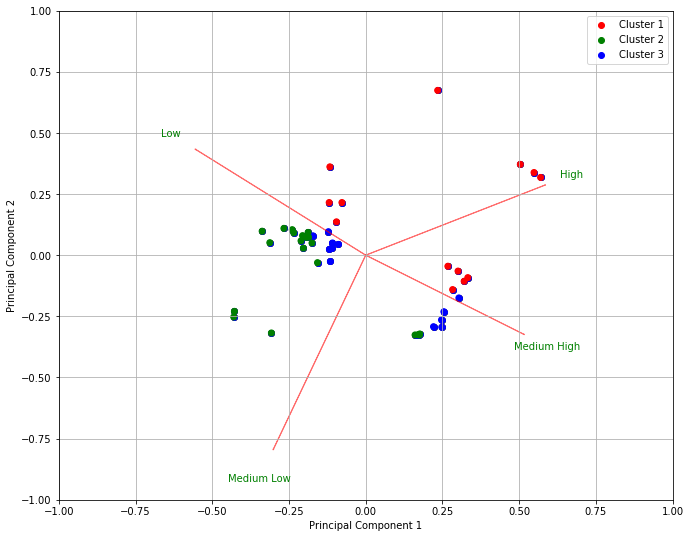

array([[16.30769231,  7.38461538,  1.61538462,  0.76923077],
       [ 2.25      , 10.55      , 14.55      ,  2.95      ],
       [ 4.16666667, 16.        ,  7.16666667,  0.83333333]])

In [23]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib.legend_handler import HandlerLine2D
# from sklearn import datasets
# from sklearn.decomposition import PCA
# iris = datasets.load_iris()
m = (np.asarray(s123))
s1_array = (m[:, :4])

# lista = []
# for i in range(1,46):
#     lista.append([0])
# s1_array = (np.append(s1_array, lista, axis=1))

# s3_array = (m[:, 4:7])
# s2_array = (m[:, 7:9])
s1_array_comp = clr(centralize(multiplicative_replacement(closure(s1_array), delta = 0.0001)))
s1_array_comp = scale(s1_array_comp)

range_s123 = range(1,11)
s1_interia = []
s1 = pd.DataFrame(s1_array_comp)
pcax1 = PCA(n_components=3).fit_transform(s1)
pcax1_dt = pd.DataFrame(pcax1)
pca = PCA()
pcax1 = pca.fit_transform(s1)

k = 3
# Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
kmeans_model = KMeans(n_clusters=k, random_state=1).fit((pd.DataFrame(s1_array)).iloc[:, :])

# These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
y = kmeans_model.labels_
f, ax = plt.subplots(figsize=(11, 9))

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    colors = ['red','green','blue']
    a = ax.scatter(xs * scalex,ys * scaley, c = colors[0], label = 'Cluster 1')
    b = ax.scatter(xs * scalex,ys * scaley, c = colors[1], label = 'Cluster 2')
    c = ax.scatter(xs * scalex,ys * scaley, c = colors[2], label = 'Cluster 3')
    plt.legend()
    d = ax.scatter(xs * scalex,ys * scaley, c = y, cmap=matplotlib.colors.ListedColormap(colors))
#     plt.legend(handler_map={ax: HandlerLine2D(numpoints=4)})
#     plt.legend(handle = [])
#     # Plot the centroids as a white X
#     centroids = kmeans_model.cluster_centers_
#     plt.scatter(centroids[:, 0], centroids[:, 1],
#     marker='x', s=169, linewidths=3,
#     color='b', zorder=10)
    
#     for i in range(n):
    plt.arrow(0, 0, coeff[0,0], coeff[0,1],color = 'r',alpha = 0.5)
    if labels is None:
        plt.text(coeff[0,0]* 1.15, coeff[0,1] * 1.15, "High", color = 'g', ha = 'center', va = 'center')
    else:
        plt.text(coeff[0,0]* 1.15, coeff[0,1] * 1.15, labels[0], color = 'g', ha = 'center', va = 'center')

    plt.arrow(0, 0, coeff[1,0], coeff[1,1],color = 'r',alpha = 0.5)
    if labels is None:
        plt.text(coeff[1,0]* 1.15, coeff[1,1] * 1.15, "Medium High", color = 'g', ha = 'center', va = 'center')
    else:
        plt.text(coeff[1,0]* 1.15, coeff[1,1] * 1.15, labels[1], color = 'g', ha = 'center', va = 'center')

    plt.arrow(0, 0, coeff[2,0], coeff[2,1],color = 'r',alpha = 0.5)
    if labels is None:
        plt.text(coeff[2,0]* 1.15, coeff[2,1] * 1.15, "Medium Low", color = 'g', ha = 'center', va = 'center')
    else:
        plt.text(coeff[2,0]* 1.15, coeff[2,1] * 1.15, labels[2], color = 'g', ha = 'center', va = 'center')

    plt.arrow(0, 0, coeff[3,0], coeff[3,1],color = 'r',alpha = 0.5)
    if labels is None:
        plt.text(coeff[3,0]* 1.15, coeff[3,1] * 1.15, "Low", color = 'g', ha = 'center', va = 'center')
    else:
        plt.text(coeff[3,0]* 1.15, coeff[3,1] * 1.15, labels[3], color = 'g', ha = 'center', va = 'center')

plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("Principal Component {}".format(1))
plt.ylabel("Principal Component {}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(pcax1[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.savefig('biplot_pca_s1_compositional.png', dpi = 500)
plt.show()
kmeans_model.cluster_centers_


(-1, 1)

(-1, 1)

Text(0.5, 0, 'Principal Component 1')

Text(0, 0.5, 'Principal Component 2')

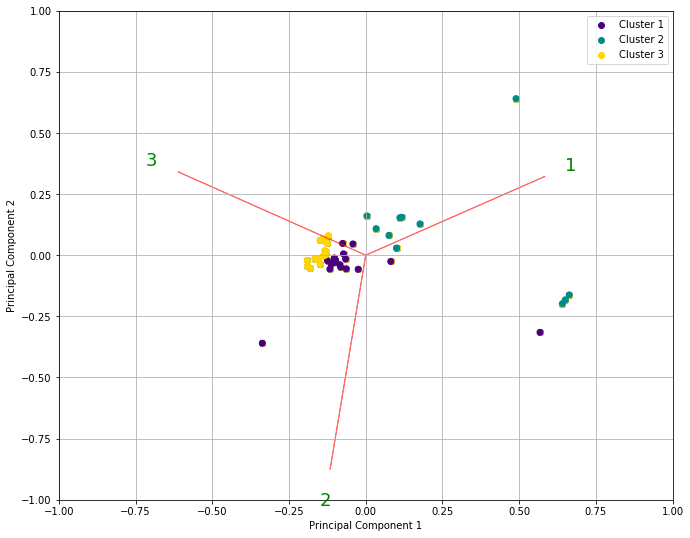

In [24]:
m = (np.asarray(s123))
# s1_array = (m[:, :4])
s3_array = (m[:, 4:7])

lista = []
for i in range(1,46):
    lista.append([0])
s3_array = (np.append(s3_array, lista, axis=1))

# s2_array = (m[:, 7:9])
s3_array_comp = clr(centralize(multiplicative_replacement(closure(s3_array), delta = 0.0001)))
s3_array_comp = scale(s3_array_comp)

range_s123 = range(1,11)
s3_interia = []
s3= pd.DataFrame(s3_array_comp)
pcax3 = PCA(n_components=2).fit_transform(s3)

pca = PCA()
pcax3 = pca.fit_transform(s3)

k = 3
# Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
kmeans_model = KMeans(n_clusters=k, random_state=1).fit((pd.DataFrame(s3_array)).iloc[:, :])

# These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
y = kmeans_model.labels_
f, ax = plt.subplots(figsize=(11, 9))

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    colors = ['indigo','darkcyan','gold']
    a = ax.scatter(xs * scalex,ys * scaley, c = colors[0], label = 'Cluster 1')
    b = ax.scatter(xs * scalex,ys * scaley, c = colors[1], label = 'Cluster 2')
    c = ax.scatter(xs * scalex,ys * scaley, c = colors[2], label = 'Cluster 3')
    plt.legend()
    d = ax.scatter(xs * scalex,ys * scaley, c = y, cmap=matplotlib.colors.ListedColormap(colors))
#     for i in range(n):
    plt.arrow(0, 0, coeff[0,0], coeff[0,1],color = 'r',alpha = 0.5)
    if labels is None:
        plt.text(coeff[0,0]* 1.15, coeff[0,1] * 1.15, "1", color = 'g', ha = 'center', va = 'center', fontsize=18)
    else:
        plt.text(coeff[0,0]* 1.15, coeff[0,1] * 1.15, labels[0], color = 'g', ha = 'center', va = 'center')

    plt.arrow(0, 0, coeff[1,0], coeff[1,1],color = 'r',alpha = 0.5)
    if labels is None:
        plt.text(coeff[1,0]* 1.15, coeff[1,1] * 1.15, "2", color = 'g', ha = 'center', va = 'center', fontsize=18)
    else:
        plt.text(coeff[1,0]* 1.15, coeff[1,1] * 1.15, labels[1], color = 'g', ha = 'center', va = 'center')

    plt.arrow(0, 0, coeff[2,0], coeff[2,1],color = 'r',alpha = 0.5)
    if labels is None:
        plt.text(coeff[2,0]* 1.15, coeff[2,1] * 1.15, "3", color = 'g', ha = 'center', va = 'center', fontsize=18)
    else:
        plt.text(coeff[2,0]* 1.15, coeff[2,1] * 1.15, labels[2], color = 'g', ha = 'center', va = 'center')


plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("Principal Component {}".format(1))
plt.ylabel("Principal Component {}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(pcax3[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.savefig('biplot_pca_s3_compositional.png', dpi = 500)
plt.show()

(-1, 1)

(-1, 1)

Text(0.5, 0, 'Principal Component 1')

Text(0, 0.5, 'Principal Component 2')

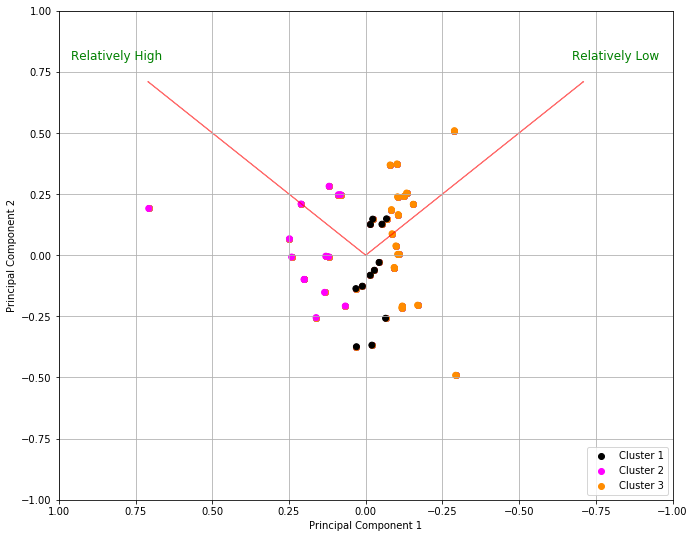

In [25]:
m = (np.asarray(s123))
# s1_array = (m[:, :4])
# s3_array = (m[:, 4:7])
s2_array = (m[:, 7:9])
s2_array_comp = clr(centralize(multiplicative_replacement(closure(s2_array), delta = 0.0001)))
s2_array_comp = scale(s2_array_comp)

range_s123 = range(1,11)
s2_interia = []
s2= pd.DataFrame(s2_array_comp)
pcax2 = PCA(n_components=2).fit_transform(s2)

pca = PCA()
pcax2 = pca.fit_transform(s2)

k = 3
# Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
kmeans_model = KMeans(n_clusters=k, init='random', random_state=1).fit((pd.DataFrame(s2_array)).iloc[:, :])

# These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
y = kmeans_model.labels_
f, ax = plt.subplots(figsize=(11, 9))

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    colors = colors = ['k','magenta','darkorange']
    a = ax.scatter(xs * scalex,ys * scaley, c = colors[0], label = 'Cluster 1')
    b = ax.scatter(xs * scalex,ys * scaley, c = colors[1], label = 'Cluster 2')
    c = ax.scatter(xs * scalex,ys * scaley, c = colors[2], label = 'Cluster 3')
    plt.legend(loc = 4)
    d = ax.scatter(xs * scalex,ys * scaley, c = y, cmap=matplotlib.colors.ListedColormap(colors))
#     for i in range(n):
    plt.arrow(0, 0, coeff[0,0], coeff[0,1],color = 'r',alpha = 0.5)
    if labels is None:
        plt.text(coeff[0,0]* 1.15, coeff[0,1] * 1.15, "Relatively High", color = 'g', ha = 'center', va = 'center', fontsize=12)
    else:
        plt.text(coeff[0,0]* 1.15, coeff[0,1] * 1.15, labels[0], color = 'g', ha = 'center', va = 'center')

    plt.arrow(0, 0, coeff[1,0], coeff[1,1],color = 'r',alpha = 0.5)
    if labels is None:
        plt.text(coeff[1,0]* 1.15, coeff[1,1] * 1.15, "Relatively Low", color = 'g', ha = 'center', va = 'center', fontsize=12)
    else:
        plt.text(coeff[1,0]* 1.15, coeff[1,1] * 1.15, labels[1], color = 'g', ha = 'center', va = 'center')



plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("Principal Component {}".format(1))
plt.ylabel("Principal Component {}".format(2))
plt.gca().invert_xaxis()
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(pcax2[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.savefig('biplot_pca_s2.1_compositional.png', dpi = 500)
plt.show()

(-1, 1)

(-1, 1)

Text(0.5, 0, 'Principal Component 1')

Text(0, 0.5, 'Principal Component 2')

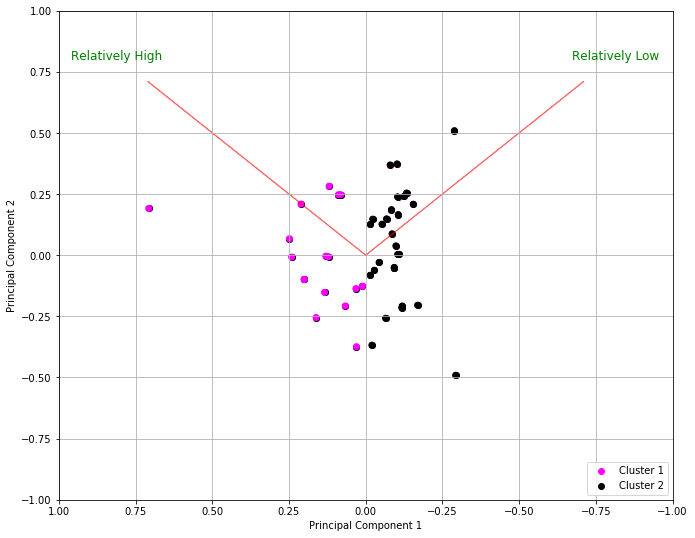

In [26]:
m = (np.asarray(s123))
# s1_array = (m[:, :4])
# s3_array = (m[:, 4:7])
s2_array = (m[:, 7:9])
s2_array_comp = clr(centralize(multiplicative_replacement(closure(s2_array), delta = 0.0001)))
s2_array_comp = scale(s2_array_comp)

range_s123 = range(1,11)
s2_interia = []
s2= pd.DataFrame(s2_array_comp)
pcax2 = PCA(n_components=2).fit_transform(s2)

pca = PCA()
pcax2 = pca.fit_transform(s2)

k = 2
# Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
kmeans_model = KMeans(n_clusters=k, random_state=1).fit((pd.DataFrame(s2_array)).iloc[:, :])

# These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
y = kmeans_model.labels_
f, ax = plt.subplots(figsize=(11, 9))

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    colors = colors = ['magenta','k']
    a = ax.scatter(xs * scalex,ys * scaley, c = colors[0], label = 'Cluster 1')
    b = ax.scatter(xs * scalex,ys * scaley, c = colors[1], label = 'Cluster 2')
    plt.legend(loc = 4)
    d = ax.scatter(xs * scalex,ys * scaley, c = y, cmap=matplotlib.colors.ListedColormap(colors))#     for i in range(n):
    plt.arrow(0, 0, coeff[0,0], coeff[0,1],color = 'r',alpha = 0.5)
    if labels is None:
        plt.text(coeff[0,0]* 1.15, coeff[0,1] * 1.15, "Relatively High", color = 'g', ha = 'center', va = 'center', fontsize=12)
    else:
        plt.text(coeff[0,0]* 1.15, coeff[0,1] * 1.15, labels[0], color = 'g', ha = 'center', va = 'center')

    plt.arrow(0, 0, coeff[1,0], coeff[1,1],color = 'r',alpha = 0.5)
    if labels is None:
        plt.text(coeff[1,0]* 1.15, coeff[1,1] * 1.15, "Relatively Low", color = 'g', ha = 'center', va = 'center', fontsize=12)
    else:
        plt.text(coeff[1,0]* 1.15, coeff[1,1] * 1.15, labels[1], color = 'g', ha = 'center', va = 'center')



plt.xlim(-1,1)
plt.ylim(-1,1)
plt.gca().invert_xaxis()
plt.xlabel("Principal Component {}".format(1))
plt.ylabel("Principal Component {}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(pcax2[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.savefig('biplot_pca_s2.2_compositional.png', dpi = 500)
plt.show()

# Jaccard Similarity index.



In [162]:
from sklearn import metrics

K = 3
kmeans_model = KMeans(n_clusters=K).fit(s1_array)
estx = cluster.KMeans(n_clusters=K)
X = pd.DataFrame(estx.fit_predict(s1_array), columns=['cluster ID'])
labelsx = estx.labels_

# K = 3
# kmeans_model = KMeans(n_clusters=K).fit(pd.DataFrame(PCA(n_components=2).fit_transform(pd.DataFrame(s1_array))))
# estx = cluster.KMeans(n_clusters=K)
# X = pd.DataFrame(estx.fit_predict(pd.DataFrame(PCA(n_components=2).fit_transform(pd.DataFrame(s1_array)))), columns=['cluster ID'])
# labelsx = estx.labels_

K = 3
kmeans_model = KMeans(n_clusters=K).fit(s2_array)
esty = cluster.KMeans(n_clusters=K)
Y = pd.DataFrame(esty.fit_predict(s2_array), columns=['cluster ID'])
labelsy = esty.labels_

# K = 3
# kmeans_model = KMeans(n_clusters=K).fit(pd.DataFrame(PCA(n_components=2).fit_transform(pd.DataFrame(s2_array))))
# esty = cluster.KMeans(n_clusters=K)
# Y = pd.DataFrame(esty.fit_predict(pd.DataFrame(PCA(n_components=2).fit_transform(pd.DataFrame(s2_array)))), columns=['cluster ID'])
# labelsy = esty.labels_

K = 3
kmeans_model = KMeans(n_clusters=K).fit(s3_array)
estz = cluster.KMeans(n_clusters=K)
Z = pd.DataFrame(estz.fit_predict(s3_array), columns=['cluster ID'])
labelsz = estz.labels_

# K = 3
# kmeans_model = KMeans(n_clusters=K).fit(pd.DataFrame(PCA(n_components=2).fit_transform(pd.DataFrame(s3_array))))
# estz = cluster.KMeans(n_clusters=K)
# Z = pd.DataFrame(estz.fit_predict(pd.DataFrame(PCA(n_components=2).fit_transform(pd.DataFrame(s3_array)))), columns=['cluster ID'])
# labelsz = estz.labels_

jaccard1 = metrics.jaccard_similarity_score(labelsy, labelsz)
jaccard2 = metrics.jaccard_similarity_score(labelsx, labelsz)
jaccard3 = metrics.jaccard_similarity_score(labelsy, labelsx)


print jaccard1
print jaccard2
print jaccard3

print labelsx
print labelsy
print labelsz

0.7555555555555555
0.7777777777777778
0.7111111111111111
[0 2 1 1 2 0 2 2 2 0 0 0 0 0 1 0 2 0 2 2 0 1 2 2 1 0 1 1 1 1 2 2 2 2 2 0 2
 1 2 2 1 1 1 0 2]
[0 2 1 2 1 2 2 2 2 0 0 0 0 0 1 0 2 0 0 2 0 1 0 0 1 2 1 1 1 1 0 0 0 0 2 0 2
 1 0 1 1 1 1 0 2]
[0 2 1 1 2 2 2 2 2 0 0 0 0 0 1 2 2 2 2 2 0 2 2 0 1 2 1 1 1 1 0 0 2 2 2 0 2
 1 0 2 1 1 1 0 0]


In [137]:
s1_2_3 = pd.read_csv("C:\\Users\\marpr\\Desktop\\docto\\clusters_1_2_3.csv", sep=';').set_index('statements')
s2_3 = pd.read_csv("C:\\Users\\marpr\\Desktop\\docto\\cluster_2_3.csv", sep=';').set_index('statements')
# s1_2 = s1_2_3[['s1', 's2']]
# s1_3 = s1_2_3[['s1', 's3']]
#comparativa 1-2 1-3 tomando 1 como referencia
s1_c1 = np.asarray(s1_2_3.iloc[0:13, 0])
s1_c2 = np.asarray(s1_2_3.iloc[13:32, 0])
s1_c3 = np.asarray(s1_2_3.iloc[32:46, 0])
s2_c1 = np.asarray(s1_2_3.iloc[0:13, 1])
s2_c2 = np.asarray(s1_2_3.iloc[13:32, 1])
s2_c3 = np.asarray(s1_2_3.iloc[32:46, 1])
s3_c1 = np.asarray(s1_2_3.iloc[0:13, 2])
s3_c2 = np.asarray(s1_2_3.iloc[13:32, 2])
s3_c3 = np.asarray(s1_2_3.iloc[32:46, 2])
#comparativa 2-3 tomando 2 como referencia

jaccard1_2__1_1 = metrics.jaccard_similarity_score(s1_c1, s2_c1)
# jaccard1_2__1_2 = metrics.jaccard_similarity_score(s1_c1, s2_c2)
jaccard1_2__1_3 = metrics.jaccard_similarity_score(s1_c1, s2_c3)

# jaccard1_2__2_1 = metrics.jaccard_similarity_score(s1_c2, s2_c1)
jaccard1_2__2_2 = metrics.jaccard_similarity_score(s1_c2, s2_c2)
# jaccard1_2__2_3 = metrics.jaccard_similarity_score(s1_c2, s2_c3)

jaccard1_2__3_1 = metrics.jaccard_similarity_score(s1_c3, s2_c1)
# jaccard1_2__3_2 = metrics.jaccard_similarity_score(s1_c3, s2_c2)
jaccard1_2__3_3 = metrics.jaccard_similarity_score(s1_c3, s2_c3)

print jaccard1_2__1_1
# print jaccard1_2__1_2
print jaccard1_2__1_3

# print jaccard1_2__2_1
print jaccard1_2__2_2
# print jaccard1_2__2_3

print jaccard1_2__3_1
# print jaccard1_2__3_2
print jaccard1_2__3_3

jaccard1_3__1_1 = metrics.jaccard_similarity_score(s1_c1, s3_c1)
# jaccard1_3__1_2 = metrics.jaccard_similarity_score(s1_c1, s3_c2)
jaccard1_3__1_3 = metrics.jaccard_similarity_score(s1_c1, s3_c3)

# jaccard1_3__2_1 = metrics.jaccard_similarity_score(s1_c2, s3_c1)
jaccard1_3__2_2 = metrics.jaccard_similarity_score(s1_c2, s3_c2)
# jaccard1_3__2_3 = metrics.jaccard_similarity_score(s1_c2, s3_c3)

jaccard1_3__3_1 = metrics.jaccard_similarity_score(s1_c3, s3_c1)
# jaccard1_3__3_2 = metrics.jaccard_similarity_score(s1_c3, s3_c2)
jaccard1_3__3_3 = metrics.jaccard_similarity_score(s1_c3, s3_c3)

print jaccard1_3__1_1
# print jaccard1_3__1_2
print jaccard1_3__1_3

# print jaccard1_3__2_1
print jaccard1_3__2_2
# print jaccard1_3__2_3

print jaccard1_3__3_1
# print jaccard1_3__3_2
print jaccard1_3__3_3

#comparativa 2-3 tomando 2 como referencia
s2_c1 = np.asarray(s2_3.iloc[0:14, 0])
s2_c2 = np.asarray(s2_3.iloc[14:26, 0])
s2_c3 = np.asarray(s2_3.iloc[26:46, 0])
s3_c1 = np.asarray(s2_3.iloc[0:14, 1])
s3_c2 = np.asarray(s2_3.iloc[14:26, 1])
s3_c3 = np.asarray(s2_3.iloc[26:46, 1])

jaccard2_3__1_1 = metrics.jaccard_similarity_score(s2_c1, s3_c1)
# jaccard2_3__1_2 = metrics.jaccard_similarity_score(s2_c1, s3_c2)
# jaccard2_3__1_3 = metrics.jaccard_similarity_score(s2_c1, s3_c3)

# jaccard2_3__2_1 = metrics.jaccard_similarity_score(s2_c2, s3_c1)
jaccard2_3__2_2 = metrics.jaccard_similarity_score(s2_c2, s3_c2)
# jaccard2_3__2_3 = metrics.jaccard_similarity_score(s2_c2, s3_c3)

# jaccard2_3__3_1 = metrics.jaccard_similarity_score(s2_c3, s3_c1)
# jaccard2_3__3_2 = metrics.jaccard_similarity_score(s2_c3, s3_c2)
jaccard2_3__3_3 = metrics.jaccard_similarity_score(s2_c3, s3_c3)

print jaccard2_3__1_1
# print jaccard2_3__1_2
# print jaccard2_3__1_3

# print jaccard2_3__2_1
print jaccard2_3__2_2
# print jaccard2_3__2_3

# print jaccard2_3__3_1
# print jaccard2_3__3_2
print jaccard2_3__3_3


0.9230769230769231
0.0
0.47368421052631576
0.0
0.8461538461538461
0.9230769230769231
0.0
0.7368421052631579
0.0
0.6923076923076923
0.7857142857142857
0.8333333333333334
0.6842105263157895


In [4]:
### from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from pycm import *


mode = pd.read_csv("C:\\Users\\marpr\\Desktop\\docto\\elsevier\\statements\\st_45_ground_truth_participants_3l.csv", sep='\t', header = None)
file_gt_s3 = "C:\\Users\\marpr\\Desktop\\docto\\elsevier\\statements\\st_45_ground_truth_3l.csv"
me_answer_s3 = pd.read_csv(file_gt_s3, delimiter='\t', header=None)
me_lista_s3 = []
        
for j,i in enumerate(range(0,45)):
    if me_answer_s3.iloc[i,1] == 2:
        me_lista_s3.append(2)
    elif me_answer_s3.iloc[i,1] == 3:
        me_lista_s3.append(3)
    else:
        me_lista_s3.append(1)
        
def SE_multiclass(name, cnf_matrix):
    FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
    FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
    TP = np.diag(cnf_matrix)
    TN = cnf_matrix.sum() - (FP + FN + TP)

    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = (TP/(TP+FN))
#     print "Sensitivity, hit rate, recall, or true positive rate: ", TPR
#     # Specificity or true negative rate
#     TNR = (TN/(TN+FP))
# #     print "Specificity or true negative rate: ", TNR
#     # Precision or positive predictive value
    PPV = TP/(TP+FP)
#     print "Precision or positive predictive value: ", PPV
    # Negative predictive value
#     NPV = TN/(TN+FN)
# #     print "Negative predictive value: ", NPV
#     # Fall out or false positive rate
#     FPR = FP/(FP+TN)
# #     print "Fall out or false positive rate: ", FPR
#     # False negative rate
#     FNR = FN/(TP+FN)
# #     print "False negative rate: ", FNR
#     # False discovery rate
#     FDR = FP/(TP+FP)
# #     print "False discovery rate: ", FDR
#     # F-score
    FS = (TPR*PPV*2)/(TPR+PPV)
    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
#     print "Overall accuracy: ", ACC
    
    final_list = list(zip(TPR, PPV, FS, ACC)) #list(zip(TPR, TNR, PPV, NPV, FPR, FNR, FDR, ACC, FS))
    final_list = pd.DataFrame(final_list)
    final_list.columns=['Recall','Precision','F-Score','Overall accuracy']
#     final_list.index = list(len(range(FNR)))
#     print FP
#     print final_list
#     final_list.to_csv(name+'.csv', sep=';')
    return final_list

classes_model_3221_results_45 = [2, 2, 1, 1, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 3, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 3, 1]

# print(classification_report(me_lista_s3, mode.iloc[2,0:45]))
cm_s3_me_ = confusion_matrix(mode.iloc[0:45,1], me_lista_s3)
cm_s3_me = SE_multiclass('S3_SS_me',cm_s3_me_)

cm_s3_model_ = confusion_matrix(mode.iloc[0:45,1], classes_model_3221_results_45)
cm_s3_model = SE_multiclass('S3_SS_model',cm_s3_model_)

print cm_s3_me
print cm_s3_me_
print '\n'
print cm_s3_model
print cm_s3_model_

     Recall  Precision   F-Score  Overall accuracy
0  0.857143   0.923077  0.888889          0.933333
1  0.692308   0.947368  0.800000          0.800000
2  1.000000   0.384615  0.555556          0.822222
[[12  1  1]
 [ 1 18  7]
 [ 0  0  5]]


     Recall  Precision   F-Score  Overall accuracy
0  0.785714   0.785714  0.785714          0.866667
1  0.807692   0.777778  0.792453          0.755556
2  0.200000   0.250000  0.222222          0.844444
[[11  3  0]
 [ 2 21  3]
 [ 1  3  1]]
